In [9]:
import pandas as pd
import matplotlib.pyplot as plt
url1="https://raw.githubusercontent.com/imdevskp/covid-19-india-data/master/nation_level_daily.csv"
mydata1=pd.read_csv(url1)

In [10]:
totalactive=mydata1["Total Confirmed"]-mydata1["Total Deceased"]-mydata1["Total Recovered"]

In [11]:
import numpy as np
xx=totalactive.to_numpy()
yy=mydata1["Daily Confirmed"].to_numpy()

Estimated coefficients:a = -81.3160575543343, b = 0.08917167718658409


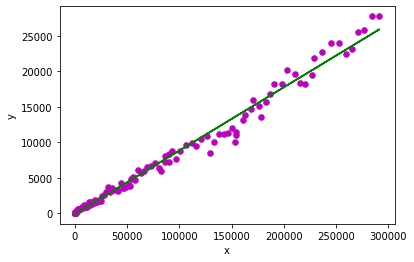

<Figure size 432x288 with 0 Axes>

In [17]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 

    # estimating coefficients 
    b = estimate_coef(xx, yy) 
    #print(b)
    print("Estimated coefficients:a = {}, b = {}".format(b[0], b[1])) 
     
    # plotting regression line 
    plot_regression_line(xx, yy, b) 
  
if __name__ == "__main__": 
    main() 
plt.savefig('Reg_Figure.png')

In [14]:
aa=-81.3160575543343
bb=0.08917167718658409
yy_pred=[]
for ii in range(0,len(yy)):
     #cc=aa+bb*xx[ii]
    yy_pred.append(aa+bb*xx[ii])
    
from sklearn.metrics import r2_score
r2_score(yy_pred,yy)

0.9879738495599992

In [18]:
    plot_regression_line(xx, yy, b) 


NameError: name 'b' is not defined

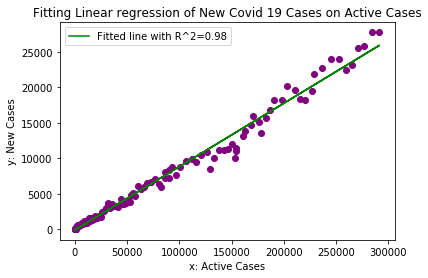

In [24]:
plt.scatter(xx,yy, color='purple')
plt.plot(xx,yy_pred, color='green', label="Fitted line with R^2=0.98")
plt.xlabel('x: Active Cases')
plt.ylabel('y: New Cases')
plt.legend()
plt.title('Fitting Linear regression of New Covid 19 Cases on Active Cases')
plt.savefig('Reg_Figure.png')